In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv("D:\data set\loan_prediction.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Uni-Variate Analysis

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

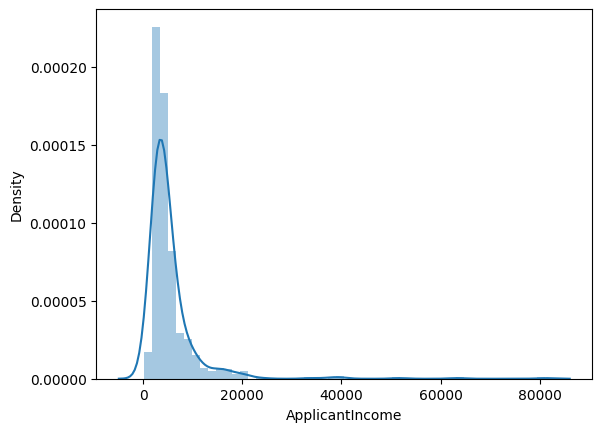

In [9]:
sns.distplot(data.ApplicantIncome)

In [12]:
sns.countplot(data.Property_Area)

ValueError: could not convert string to float: 'Urban'

In [ ]:
sns.countplot(data.Gender)

In [ ]:
sns.countplot(data.Education)

In [ ]:
sns.countplot(data.Self_Employed)

In [ ]:
sns.countplot(data.Married)

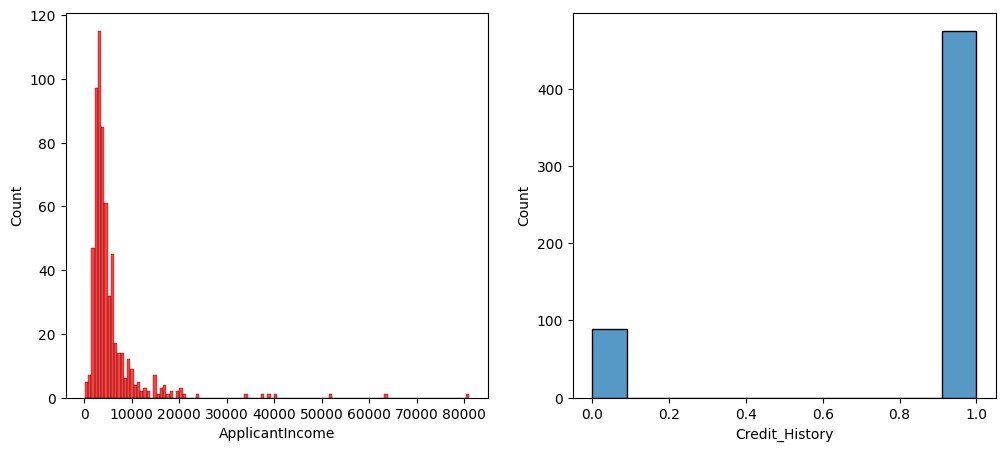

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.histplot(data['ApplicantIncome'], color='r')
plt.subplot(122)
sns.histplot(data['Credit_History'])
plt.show()

Bivariate  Analysis


In [ ]:
sns.countplot(data['Married'],hue=data['Gender'])

In [ ]:
sns.countplot(data['LoanAmount'],hue=data['Property_Area'])


In [ ]:
sns.countplot(data['Education'],hue=data['Self_Employed'])

In [14]:
sns.barplot(data.ApplicantIncome,data.CoapplicantIncome)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

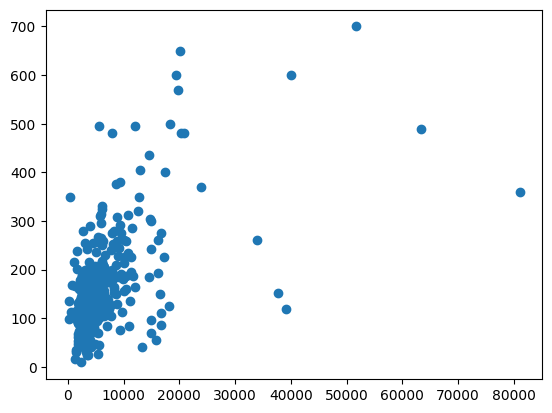

In [15]:
plt.scatter(data.ApplicantIncome,data.LoanAmount)

ValueError: could not convert string to float: 'Male'

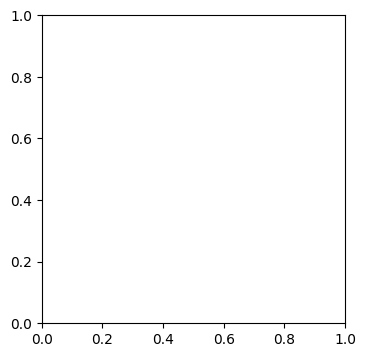

In [16]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data['Gender'])
plt.subplot(1,4,2)
sns.countplot(data['Education'])
plt.show()

Multivariate Analysis

<AxesSubplot:>

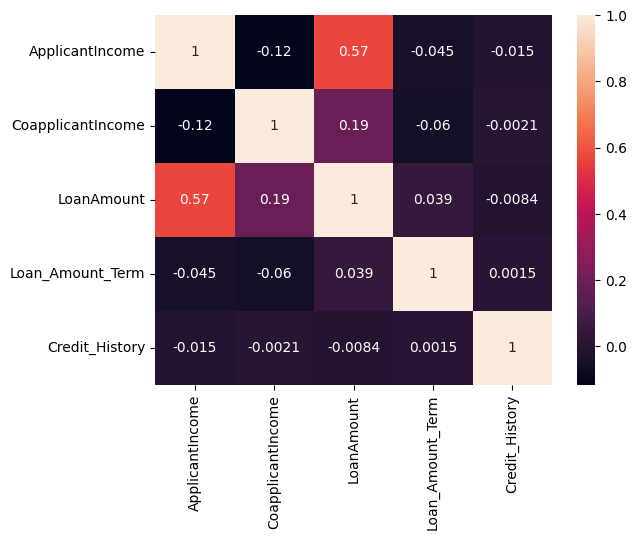

In [17]:
sns.heatmap(data.corr(),annot=True)

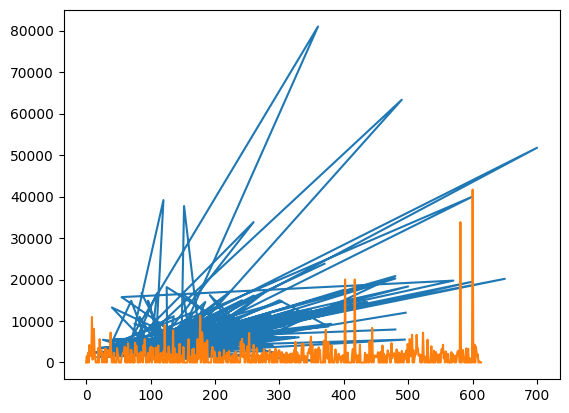

In [18]:
plt.plot(data.LoanAmount,data.ApplicantIncome,data.CoapplicantIncome)

<AxesSubplot:>

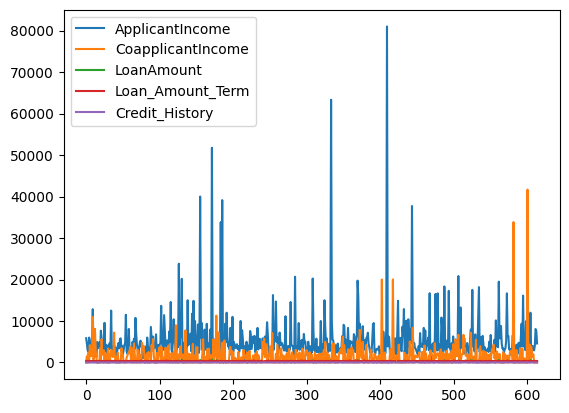

In [19]:
data.plot.line()

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

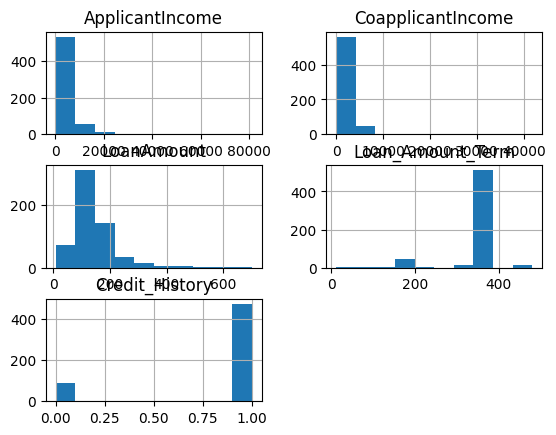

In [20]:
data.hist()

In [21]:
sns.swarmplot(data['Gender'],data['ApplicantIncome'], hue=data['Loan_Status'])

TypeError: swarmplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

Descriptive Analysis


In [22]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Data Pre-processing
&Checking for Null values

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [24]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Handling Categorical Values

In [25]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [26]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Dependents'] = le.fit_transform(data['Dependents'])
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])
data['Married'] = le.fit_transform(data['Married'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Education'] = le.fit_transform(data['Education'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])

In [29]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


Balancing the datasets

In [30]:
from imblearn.combine import SMOTETomek

In [31]:
smote=SMOTETomek(0.95)

In [32]:
y=data['Loan_Status']
x=data.drop(columns=["Loan_ID",'Loan_Status'],axis=1)
x_bal,y_bal=smote.fit_resample(x,y)
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    353
0    331
Name: Loan_Status, dtype: int64


Scaling the Data

In [33]:
sc=StandardScaler()
x_bal_scaled=sc.fit_transform(x_bal)
x_bal_scaled = pd.DataFrame(x_bal,columns=x.columns)
x_bal_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.000000,120.000000,360.000000,1.000000,2
1,1,1,1,0,0,4583,1508.000000,128.000000,360.000000,1.000000,0
2,1,1,0,0,1,3000,0.000000,66.000000,360.000000,1.000000,2
3,1,1,0,1,0,2583,2358.000000,120.000000,360.000000,1.000000,2
4,1,0,0,0,0,6000,0.000000,141.000000,360.000000,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
679,1,1,0,1,0,3125,1820.557086,121.067283,360.000000,0.000000,0
680,1,1,0,0,0,7178,4786.627740,316.278540,360.000000,0.506114,0
681,0,0,0,0,0,9319,0.000000,238.485975,360.000000,1.000000,1
682,1,1,1,0,0,3857,3563.627342,213.638139,360.000000,0.157457,2


Processed Data

In [34]:
df=pd.concat([x_bal_scaled,y_bal],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.000000,120.000000,360.000000,1.000000,2,1
1,1,1,1,0,0,4583,1508.000000,128.000000,360.000000,1.000000,0,0
2,1,1,0,0,1,3000,0.000000,66.000000,360.000000,1.000000,2,1
3,1,1,0,1,0,2583,2358.000000,120.000000,360.000000,1.000000,2,1
4,1,0,0,0,0,6000,0.000000,141.000000,360.000000,1.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
679,1,1,0,1,0,3125,1820.557086,121.067283,360.000000,0.000000,0,0
680,1,1,0,0,0,7178,4786.627740,316.278540,360.000000,0.506114,0,0
681,0,0,0,0,0,9319,0.000000,238.485975,360.000000,1.000000,1,0
682,1,1,1,0,0,3857,3563.627342,213.638139,360.000000,0.157457,2,0


Saving into train test datasets

In [35]:
train,test = train_test_split(df, test_size=0.33, random_state=42)

In [36]:
train.to_csv('train.csv',encoding='utf-8',index=False)
test.to_csv('test.csv',encoding='utf-8',index=False)

Splitting the data

In [37]:
x=df.drop(["Loan_Status"],axis=1)

In [38]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.000000,120.000000,360.000000,1.000000,2
1,1,1,1,0,0,4583,1508.000000,128.000000,360.000000,1.000000,0
2,1,1,0,0,1,3000,0.000000,66.000000,360.000000,1.000000,2
3,1,1,0,1,0,2583,2358.000000,120.000000,360.000000,1.000000,2
4,1,0,0,0,0,6000,0.000000,141.000000,360.000000,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
679,1,1,0,1,0,3125,1820.557086,121.067283,360.000000,0.000000,0
680,1,1,0,0,0,7178,4786.627740,316.278540,360.000000,0.506114,0
681,0,0,0,0,0,9319,0.000000,238.485975,360.000000,1.000000,1
682,1,1,1,0,0,3857,3563.627342,213.638139,360.000000,0.157457,2


In [39]:
y=df.Loan_Status
y

0      1
1      0
2      1
3      1
4      1
      ..
679    0
680    0
681    0
682    0
683    0
Name: Loan_Status, Length: 684, dtype: int32

Splitting Data Into Train And Test

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
def decisionTree(x_train,x_test,y_train,y_test):
  dt = DecisionTreeClassifier()
  dt.fit(x_train,y_train)
  pred_test = dt.predict(x_test)
  pred_test
  print('***DecisionTreeClassifier***')
  print('Confusion Matrix')
  print(confusion_matrix(y_test,pred_test))
  print('Classification Report')
  print(classification_report(y_test,pred_test))
  print('Score')
  print(dt.score(x_test,y_test))

In [43]:
decisionTree(x_train,x_test,y_train,y_test)

***DecisionTreeClassifier***
Confusion Matrix
[[49 13]
 [14 61]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.79      0.78        62
           1       0.82      0.81      0.82        75

    accuracy                           0.80       137
   macro avg       0.80      0.80      0.80       137
weighted avg       0.80      0.80      0.80       137

Score
0.8029197080291971


In [44]:
def randomForest(x_train,x_test,y_train,y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred_test = rf.predict(x_test)
    print("**** Random Forest Classifier ****")
    print('Confusion Matrix')
    print(confusion_matrix(y_test,pred_test))
    print('Classification Report')
    print(classification_report(y_test,pred_test))
    print('Score')
    print(rf.score(x_test,y_test))

In [45]:
randomForest(x_train,x_test,y_train,y_test)

**** Random Forest Classifier ****
Confusion Matrix
[[51 11]
 [ 8 67]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        62
           1       0.86      0.89      0.88        75

    accuracy                           0.86       137
   macro avg       0.86      0.86      0.86       137
weighted avg       0.86      0.86      0.86       137

Score
0.8613138686131386


In [46]:
def KNN(x_train,x_test,y_train,y_test):
    Knn = KNeighborsClassifier()
    Knn.fit(x_train,y_train)
    pred_test = Knn.predict(x_test)
    print("**** KNeigborsClassifier ****")
    print('Confusion Matrix')
    print(confusion_matrix(y_test,pred_test))
    print('Classification Report')
    print(classification_report(y_test,pred_test))
    print('Score')
    print(Knn.score(x_test,y_test))

In [47]:
KNN(x_train,x_test,y_train,y_test)

**** KNeigborsClassifier ****
Confusion Matrix
[[38 24]
 [26 49]]
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.61      0.60        62
           1       0.67      0.65      0.66        75

    accuracy                           0.64       137
   macro avg       0.63      0.63      0.63       137
weighted avg       0.64      0.64      0.64       137

Score
0.635036496350365


In [48]:
def xgboost(x_train,x_test,y_train,y_test):
    xg= KNeighborsClassifier()
    xg.fit(x_train,y_train)
    pred_test = xg.predict(x_test)
    print("**** GradientBoostingClassifier****")
    print('Confusion Matrix')
    print(confusion_matrix(y_test,pred_test))
    print('Classification Report')
    print(classification_report(y_test,pred_test))
    print("score")
    print(xg.score(x_test,y_test))

In [49]:
xgboost(x_train,x_test,y_train,y_test)

**** GradientBoostingClassifier****
Confusion Matrix
[[38 24]
 [26 49]]
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.61      0.60        62
           1       0.67      0.65      0.66        75

    accuracy                           0.64       137
   macro avg       0.63      0.63      0.63       137
weighted avg       0.64      0.64      0.64       137

score
0.635036496350365


In [50]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_test = rf.predict(x_test)

In [51]:
f1_score(pred_test,y_test,average='weighted')

0.8549186802310642

In [52]:
cv=cross_val_score(rf,x,y,cv=5)

In [53]:
np.mean(cv)

0.820298411335337

In [54]:
pickle.dump(rf,open('rdf.pkl','wb'))

In [55]:
pickle.dump(sc,open("scalar.pkl","wb"))

IBM-Deployment

In [1]:
pip install -U ibm-watson-machine-learning


     ---------------------------------------- 1.8/1.8 MB 413.1 kB/s eta 0:00:00
     -------------------------------------- 55.6/55.6 kB 720.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 956.8/956.8 kB 738.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 135.7/135.7 kB 308.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: jmespath
    Found existing installation: jmespath 1.0.1
    Uninstalling jmespath-1.0.1:
      Successfully uninstalled jmespath-1.0.1
  Running setup.py install for ibm-cos-sdk-core: started
  Running setup.py install for ibm-cos-sdk-core: finished with status 'done'
  Running setup.py install for ibm-cos-sdk-s3transfer: started
  Running setup.

  DEPRECATION: ibm-cos-sdk-core is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  DEPRECATION: ibm-cos-sdk-s3transfer is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  DEPRECATION: ibm-cos-sdk is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option

In [ ]:
from ibm_watson_machine_learning import APIClient
import json

In [ ]:
wml_credentials = {
    "apikey":"pYsrmaRyzz3LufvFxHnD2hbld7dSoiqu4iIsV0Rbk8Ry",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [ ]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

In [ ]:
SPACE_ID= "fc1e7624-773f-4e76-b9cb-d6a9a4e5a1a9"

In [ ]:
wml_client.set.default_space(SPACE_ID)

In [ ]:
wml_client.software_specifications.list(500)

In [ ]:
import sklearn
sklearn.__version__

In [ ]:
MODEL_NAME = 'Loan'
DEPLOYMENT_NAME = 'Approval'
DEMO_MODEL =Rmodel

In [ ]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [ ]:
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [ ]:
#Save model
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=xtrain, 
    training_target=ytrain
)

In [ ]:
model_details

In [ ]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

In [ ]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [ ]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)